In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,KFold,RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
df=pd.read_csv('cpp_cleaned_data')

In [3]:
x=df.drop(['price'],axis=1)
y=df['price']

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)

In [5]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)

print(f'score for train data: {knr.score(x_train,y_train)}')
print(f'score for test data: {knr.score(x_test,y_test)}')

score for train data: 0.8264501108970426
score for test data: 0.7368921028172619


In [7]:
print(f"predicted: {knr.predict([x_test.iloc[-1,:]])}\ntrue: {y_test.iloc[-1]}")

predicted: [12245.]
true: 10945.0


In [40]:
y_pred=knr.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
rmse=mse**0.5
mae=mean_absolute_error(y_test,y_pred)
r_squared=r2_score(y_test,y_pred)
print(f"mse: {mse}\nrmse: {rmse}\nmae: {mae}\nr_squared: {r_squared}")

mse: 7127472.61383469
rmse: 2669.732685838545
mae: 1957.6991788617888
r_squared: 0.8144952893806129


Elbow method for increase accuracy

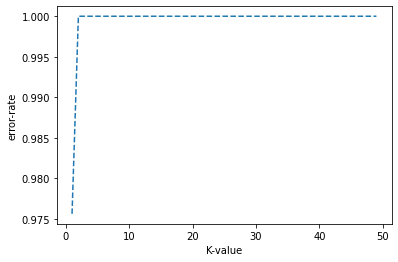

In [10]:
import matplotlib.pyplot as plt
error_rate=[]
for i in range (1,50):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    knn_pre=knn.predict(x_test)
    error_rate.append(np.mean(knn_pre!=y_test))
    
plt.plot(range(1,50),error_rate,linestyle='dashed')
plt.xlabel('K-value')
plt.ylabel('error-rate')
plt.show()

In [38]:
knr_3=KNeighborsRegressor(n_neighbors=3)
knr_3.fit(x_train,y_train)

print(f'score for train data: {knr_3.score(x_train,y_train)}')
print(f'score for test data: {knr_3.score(x_test,y_test)}')

score for train data: 0.8971805848985644
score for test data: 0.8144952893806129


In [39]:
print(f"predicted: {knr_3.predict([x_test.iloc[-1,:]])}\ntrue: {y_test.iloc[-1]}")

predicted: [13711.66666667]
true: 10945.0


In [42]:
y_pred1=knr_3.predict(x_test)
mse=mean_squared_error(y_test,y_pred1)
rmse=mse**0.5
mae=mean_absolute_error(y_test,y_pred1)
r_squared=r2_score(y_test,y_pred1)
print(f"mse: {mse}\nrmse: {rmse}\nmae: {mae}\nr_squared: {r_squared}")

mse: 7127472.61383469
rmse: 2669.732685838545
mae: 1957.6991788617888
r_squared: 0.8144952893806129


HyperParameterTuning:

In [29]:
knr_h=KNeighborsRegressor()
params={'n_neighbors':[1,2,3,4,5,6],
        'weights':['uniform', 'distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
       }
cv=KFold(n_splits=5,shuffle=True,random_state=41)

clf=RandomizedSearchCV(knr_h,params,cv=cv,n_jobs=-1,verbose=3,scoring='accuracy',n_iter=100)

In [30]:
clf.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/home/vaishu/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/vaishu/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=41, shuffle=True),
                   estimator=KNeighborsRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy', verbose=3)

In [33]:

print(f"predicted: {clf.predict([x_test.iloc[-1,:]])}\ntrue: {y_test.iloc[-1]}")

predicted: [11845.]
true: 10945.0


In [34]:
clf.best_params_

{'weights': 'uniform', 'n_neighbors': 1, 'algorithm': 'auto'}

In [43]:
y_predh=clf.predict(x_test)
mse=mean_squared_error(y_test,y_predh)
rmse=mse**0.5
mae=mean_absolute_error(y_test,y_predh)
r_squared=r2_score(y_test,y_pred1)
print(f"mse: {mse}\nrmse: {rmse}\nmae: {mae}\nr_squared: {r_squared}")

mse: 15002955.480094852
rmse: 3873.3648782544165
mae: 3014.5812926829267
r_squared: 0.8144952893806129


In [ ]:
#Knr_3 was best with accuracy